Plot For Write a SQL query to fetch the top 10 users who contributed the highest revenue 
within the last 30 days, along with the number of groups they participated in and 
the categories of products they purchased.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Replace The Connection Strings With Your's 

In [2]:

DB_CONFIG = {
    'host': 'localhost',
    'database': 'SQLTEST',
    'user': 'postgres',
    'password': 'Admin'
}

In [3]:

conn = psycopg2.connect(**DB_CONFIG)

In [4]:

query = """
WITH UserRevenue AS (
    SELECT 
        gc.user_id,
        SUM(o.total_amount) AS total_revenue,
        COUNT(DISTINCT g.id) AS group_count
    FROM 
        orders o
    JOIN 
        groups_carts gc ON o.groups_carts_id = gc.id
    JOIN 
        groups g ON gc.group_id = g.id
    WHERE 
        o.created_at >= NOW() - INTERVAL '60 days' 
        AND o.status = 'COMPLETED'
    GROUP BY 
        gc.user_id
),
UserCategories AS (
    SELECT 
        u.id AS user_id,
        ARRAY_AGG(DISTINCT c.name) AS categories
    FROM 
        users u
    JOIN 
        groups_carts gc ON u.id = gc.user_id
    JOIN 
        groups g ON gc.group_id = g.id
    JOIN 
        group_deals gd ON g.group_deals_id = gd.id
    JOIN 
        products p ON gd.product_id = p.id
    JOIN 
        product_names pn ON p.name_id = pn.id
    JOIN 
        categories c ON pn.category_id = c.id
    GROUP BY 
        u.id
)
SELECT 
    u.user_id,
    usr.name,
    u.total_revenue,
    u.group_count,
    uc.categories
FROM 
    UserRevenue u
LEFT JOIN 
    UserCategories uc ON u.user_id = uc.user_id
JOIN 
    users usr ON u.user_id = usr.id
ORDER BY 
    u.total_revenue DESC
LIMIT 10;
"""


In [5]:
df = pd.read_sql_query(query, conn)
conn.close()

C:\Users\huawei\AppData\Local\Temp\ipykernel_8692\711990737.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [6]:

df.head()

,user_id,name,total_revenue,group_count,categories
0,e81455bb-8b3b-4346-ba8f-521d4ebf4d92,meriem,3276.0,10,"[Baking Goods, Condiments , Dairy, Fruit, Hous..."
1,e1e1ef41-fce1-4fdd-a1b2-1326bd373fe3,Belsti,2858.0,6,"[Baby Items, Baking Goods, Condiments , Fruit,..."
2,d25a7eb5-3e7d-40d2-bc30-e370111e79f1,Tsion,2777.0,16,"[Baby Items, Condiments , Fruit, Packed Food &..."
3,a69c75d9-31d2-49fc-98a3-93d937bb011f,fikadu,2728.0,16,"[Baby Items, Condiments , Dairy, Fruit, Packed..."
4,ef7c0d65-1619-4685-8527-3b65a194bfd6,Etalem,2645.0,16,"[Baby Items, Condiments , Fruit, Packed Food &..."


In [7]:

df['categories_count'] = df['categories'].apply(lambda x: len(x))

In [8]:

sns.set(style="whitegrid")

# 1. Bar Chart of Total Revenue by User

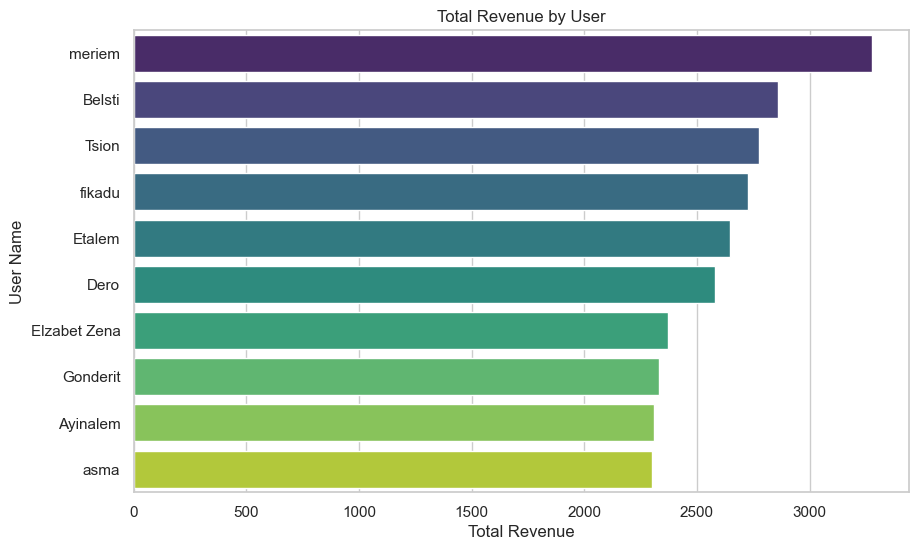

In [9]:

plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='name', data=df, palette='viridis')
plt.title('Total Revenue by User')
plt.xlabel('Total Revenue')
plt.ylabel('User Name')
plt.show()

# 2. Pie Chart of Group Count Distribution

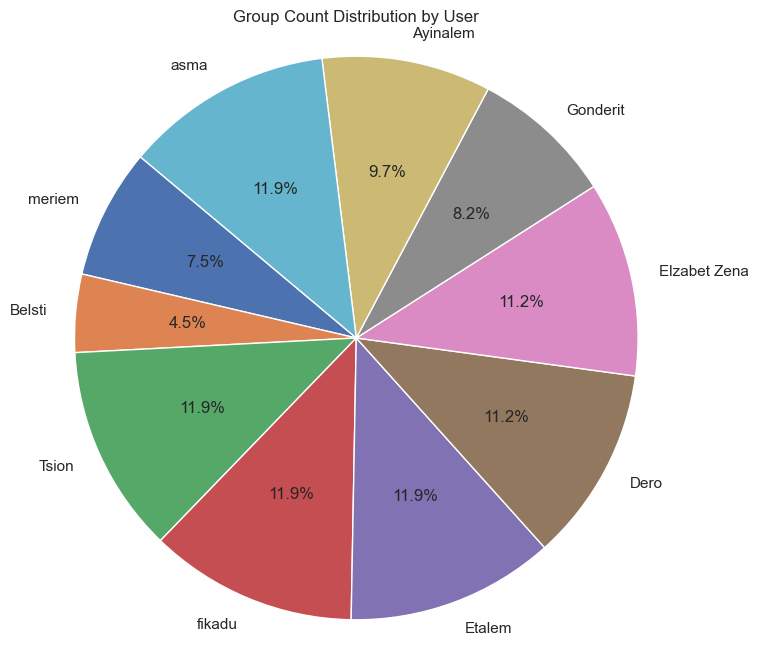

In [10]:

plt.figure(figsize=(8, 8))
plt.pie(df['group_count'], labels=df['name'], autopct='%1.1f%%', startangle=140)
plt.title('Group Count Distribution by User')
plt.axis('equal')  
plt.show()


# 3. Bar Chart of Categories Count per User

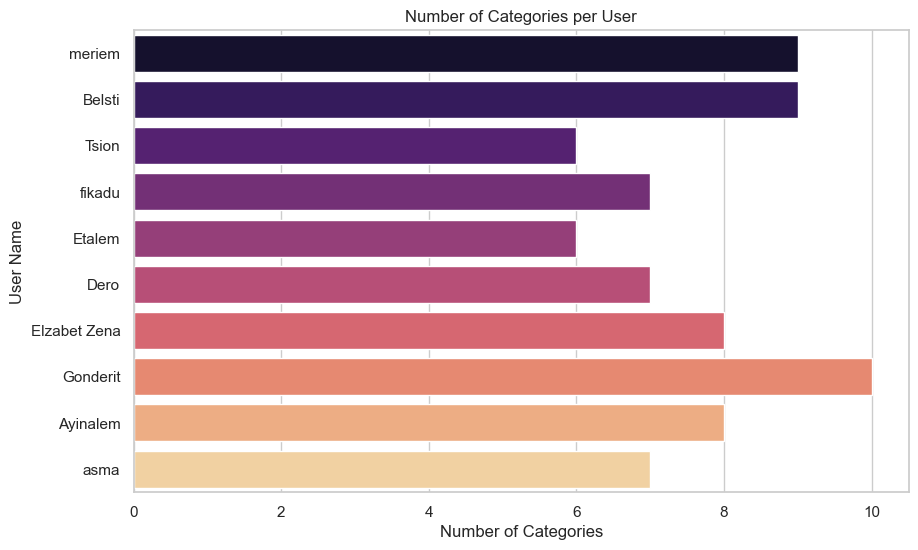

In [11]:

plt.figure(figsize=(10, 6))
sns.barplot(x='categories_count', y='name', data=df, palette='magma')
plt.title('Number of Categories per User')
plt.xlabel('Number of Categories')
plt.ylabel('User Name')
plt.show()